In [ ]:
pip install matplotlib

In [ ]:
# 필요한 라이브러리 설치
!pip install pandas numpy scikit-learn matplotlib

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# 데이터 로딩
# CP949 인코딩을 사용하여 csv 파일 로드
stock_list = pd.read_csv('stock_list.csv', encoding='cp949')
stock_values_linear = pd.read_csv('stock_values_linear.csv', encoding='cp949')
stock_values_logistic = pd.read_csv('stock_values_logistic.csv', encoding='cp949')

KOSDAQ 에프에스티의 다음 주 주가예측모델 평가 MSE: 68139.00097162966


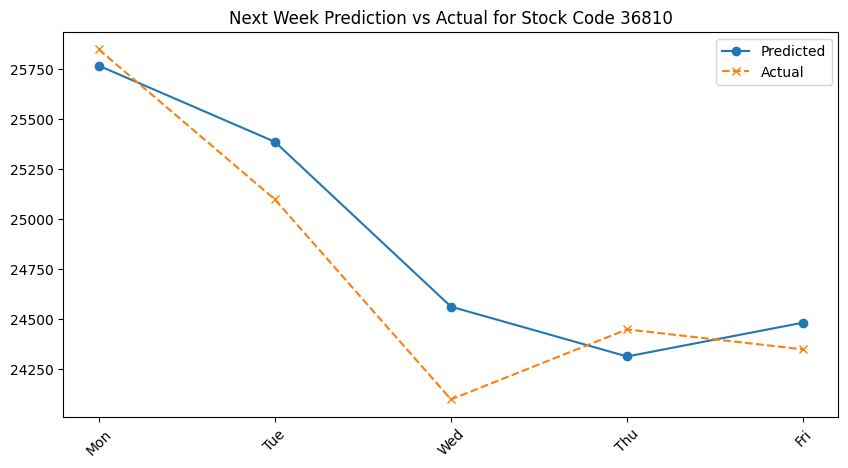

KOSPI 삼성전자의 다음 주 주가예측모델 평가 MSE: 3768734.6178487586


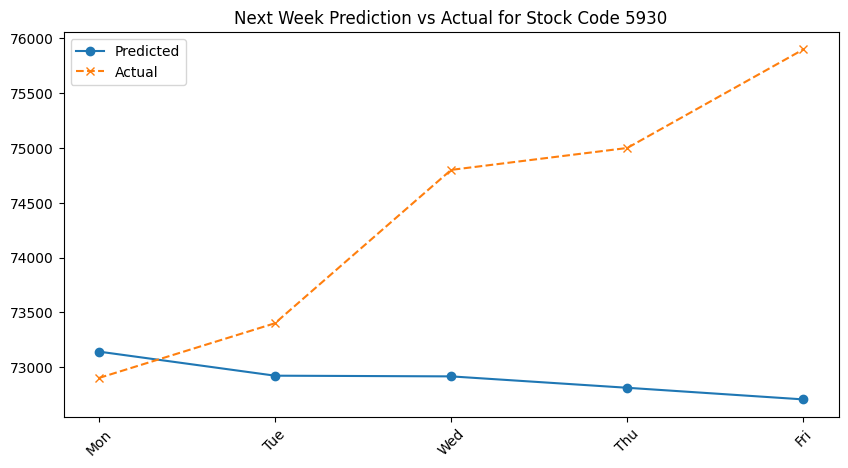

KOSDAQ 코미팜의 다음 주 주가예측모델 평가 MSE: 7134.962420715982


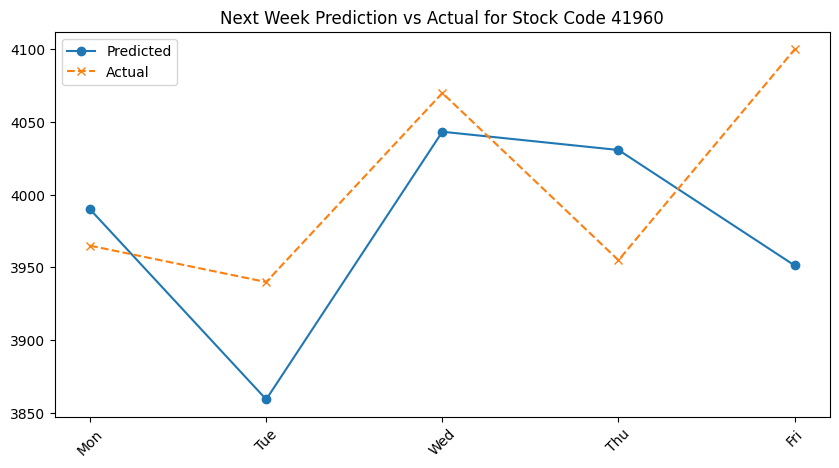

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 주식 리스트에서 3개의 주식 종목 코드를 선택
sample_stocks = stock_list['종목코드'].sample(3).values

def predict_next_week_prices(stock_code):
    # 종목코드를 보고 종목이름 알기
    stock_name = stock_list[stock_list['종목코드'] == stock_code]['종목명'].iloc[0]
    stock_type = stock_list[stock_list['종목코드'] == stock_code]['상장시장'].iloc[0]
    data = stock_values_linear[stock_values_linear['종목코드'] == stock_code].iloc[:, 1:].values.flatten()
    X = []
    y = []
    for i in range(0, len(data) - 5, 5):  # i를 10씩 증가시키며 반복
        X.append(data[i:i+5])  # 이번 주 데이터 (월요일부터 금요일까지)
        y.append(data[i+5:i+10])  # 다음 주 데이터 (월요일부터 금요일까지)
    X = np.array(X)
    y = np.array(y)

    # 데이터 분리, 시계열 데이터의 순서 유지
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    # 훈련 데이터와 테스트 데이터 분할
    X_train = X[:23]  # 처음 120개, 23주치
    y_train = y[:23]  # 처음 120개, 23주치

    X_test = X[23:]  # 마지막 5개
    y_test = y[23:]  # 마지막 5개

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{stock_type} {stock_name}의 다음 주 주가예측모델 평가 MSE: {mse}")

    # 예측 결과와 실제 데이터 시각화 (다음 주 월요일부터 금요일까지)
    plt.figure(figsize=(10, 5))
    days = ["Mon", "Tue", "Wed", "Thu", "Fri"]
    # 테스트 세트에 대한 첫 번째 예측 주와 실제 데이터 선택
    y_pred_first_week = y_pred[0]  # 첫 번째 예측된 주
    y_test_first_week = y_test[0]  # 첫 번째 실제 주
    x_ticks = np.arange(5)  # 다음 주의 요일 수 (월~금)

    # 예측된 데이터 플롯
    plt.plot(x_ticks, y_pred_first_week, label='Predicted', marker='o')
    # 실제 데이터 플롯
    plt.plot(x_ticks, y_test_first_week, label='Actual', marker='x', linestyle='--')
    plt.xticks(x_ticks, days, rotation=45)  # 월요일부터 금요일까지의 라벨
    plt.title(f"Next Week Prediction vs Actual for Stock Code {stock_code}")
    plt.legend()
    plt.show()

# sample_stocks는 예측을 수행할 종목 코드 리스트입니다.
for code in sample_stocks:
    predict_next_week_prices(code)


KOSPI SK의 다음주 주가추세예측모델 정확도: 1.0


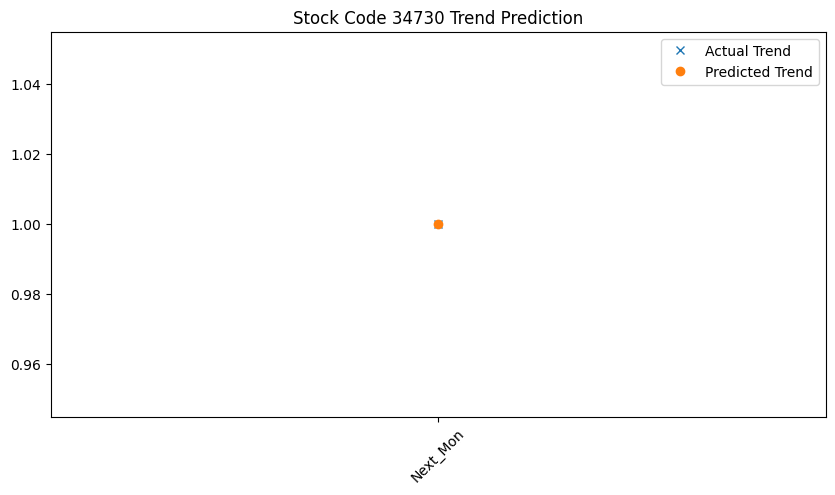

KOSPI KCC의 다음주 주가추세예측모델 정확도: 1.0


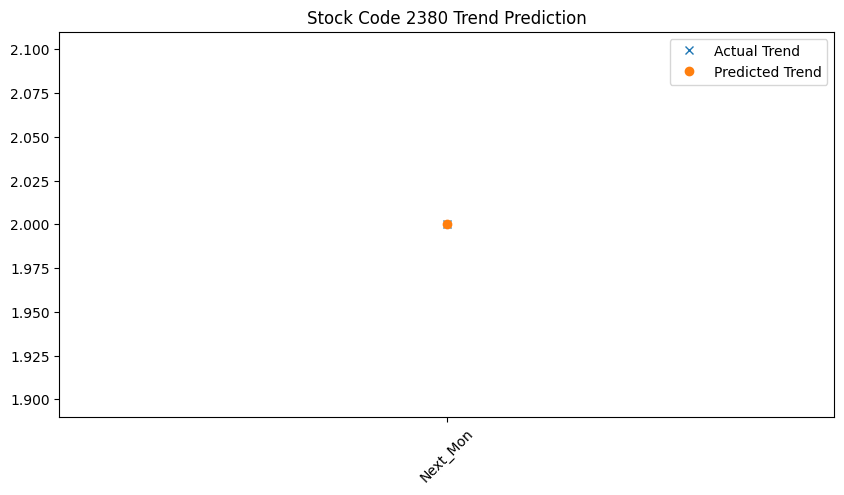

KOSDAQ 서희건설의 다음주 주가추세예측모델 정확도: 0.0


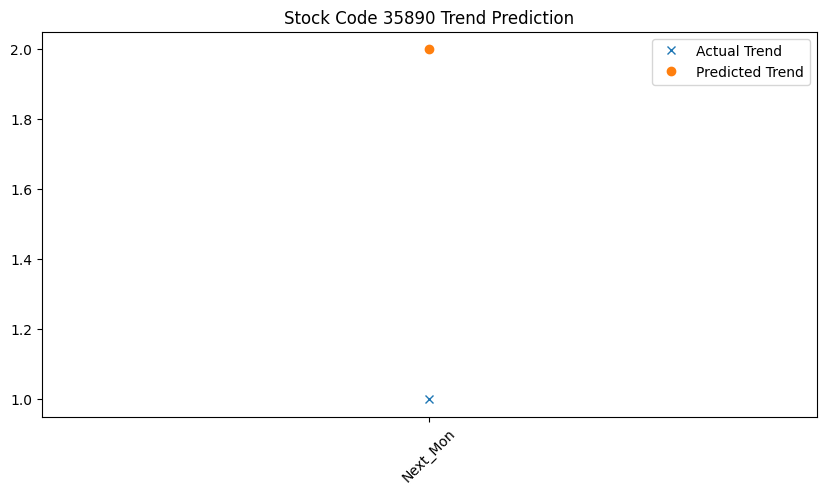

적중률 = 2/3


In [35]:
sample_stocks = stock_list['종목코드'].sample(3).values

def predict_next_week_trend(stock_code):
    stock_name = stock_list[stock_list['종목코드'] == stock_code]['종목명'].iloc[0]
    stock_type = stock_list[stock_list['종목코드'] == stock_code]['상장시장'].iloc[0]
    # 주식 가격 정보 추출
    data = stock_values_logistic[stock_values_logistic['종목코드'] == stock_code].iloc[:, 1:].values.flatten()
    X = []
    y = []
    for i in range(0, len(data) - 6, 5):
        X.append(data[i:i+5]) # 이번 주 데이터 추가
        y.append([data[i+6]]) # 다음주 월요일 데이터 추가
    X = np.array(X)
    y = np.array(y)

    # 데이터 분리
    X_train = X[:23]
    y_train = y[:23].ravel()

    X_test = X[23:]
    y_test = y[23:].ravel()

    # 로지스틱 회귀 모델 학습
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{stock_type} {stock_name}의 다음주 주가추세예측모델 정확도: {accuracy}")


    # 실제 값과 예측 값 비교 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, 'x', label='Actual Trend')  # 점으로 표시
    plt.plot(y_pred, 'o', label='Predicted Trend', linestyle='None')
    plt.title(f"Stock Code {stock_code} Trend Prediction")
    x_ticks = np.arange(1)
    days = ["Next_Mon"]
    plt.xticks(x_ticks, days, rotation=45)
    plt.legend()
    plt.show()
    return accuracy

accur = 0.0
# 3개 종목에 대해 추세 예측 실행
for code in sample_stocks:
    accur += predict_next_week_trend(code)
num = int(accur)
if num < 3:
    print(f"적중률 = {num}/3")
else:
    print(f"적중률 = 1")
